# Day 6: Introduction to Statistics

This notebook covers descriptive statistics and correlation analysis.

## 1. Setting up the Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

## 2. Descriptive Statistics

[120.99033155 113.86950524 100.89445555  90.29594833 110.4733497
 105.90228078 113.4278983  109.52757703 115.74329073  91.97147183
 119.76091098 102.96399407 131.12891309  89.66218273 126.03945705
 102.96866175  90.22872995  92.74171249  95.19479038 106.3624892
 107.84253232  91.39449994  99.63468112 132.13405538 125.91314755
 106.54485505 100.57005217 101.8004699  109.20276959  84.65811152
  96.13935194  74.97123889 105.98834684 109.7079391   92.75220307
 123.60980145  81.61351505  78.0343768  103.36677728 115.70647454
 125.25891537  93.11673606 116.1802125   99.42237296  97.4105905
 113.25489906 109.78484318  76.35411765 122.14810525 120.70137031
  90.61655948 105.937053   107.41045279 103.91010649  91.74542269
  89.92564948  99.61668894 117.59093529 108.15400232  94.44078502
 111.57548066  57.27186069 117.23148551  73.90429332  94.56338588
  83.20495158  80.57977786 117.41240181  92.98448198 105.19755823
  99.29619132 107.15561241 101.15232837  80.75511664 114.94400229
  92.59365125

C:\Users\Nandhan\AppData\Local\Temp\ipykernel_20136\3277287105.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_val = stats.mode(data)[0][0]


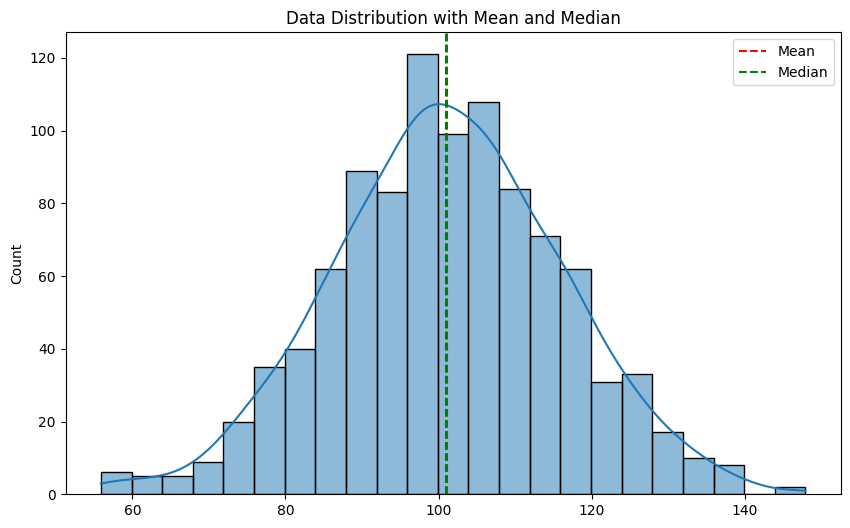

In [ ]:
# Generate sample data
data = np.random.normal(100, 15, 1000)
print(data)

# Calculate basic statistics
mean_val = np.mean(data)
median_val = np.median(data)
mode_val = stats.mode(data)[0][0]
std_val = np.std(data)
var_val = np.var(data)

print("Basic Statistics:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")
print(f"Variance: {var_val:.2f}")

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.axvline(mean_val, color='r', linestyle='--', label='Mean')
plt.axvline(median_val, color='g', linestyle='--', label='Median')
plt.legend()
plt.title('Data Distribution with Mean and Median')
plt.show()

## 3. Measures of Central Tendency and Spread

In [ ]:
# Create a dataset with different distributions
normal_data = np.random.normal(100, 15, 1000)
skewed_data = np.random.exponential(20, 1000)
bimodal_data = np.concatenate([np.random.normal(80, 10, 500), 
                              np.random.normal(120, 10, 500)])

# Function to calculate and display statistics
def display_statistics(data, name):
    stats_dict = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Mode': stats.mode(data)[0][0],
        'Std Dev': np.std(data),
        'Variance': np.var(data),
        'Skewness': stats.skew(data),
        'Kurtosis': stats.kurtosis(data)
    }
    print(f"\nStatistics for {name} distribution:")
    for stat, value in stats_dict.items():
        print(f"{stat}: {value:.2f}")
    return stats_dict

# Plot distributions and display statistics
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle('Different Types of Distributions')

distributions = [
    (normal_data, 'Normal', axes[0]),
    (skewed_data, 'Skewed', axes[1]),
    (bimodal_data, 'Bimodal', axes[2])
]

for data, name, ax in distributions:
    stats_dict = display_statistics(data, name)
    sns.histplot(data, kde=True, ax=ax)
    ax.axvline(stats_dict['Mean'], color='r', linestyle='--', label='Mean')
    ax.axvline(stats_dict['Median'], color='g', linestyle='--', label='Median')
    ax.set_title(f'{name} Distribution')
    ax.legend()

plt.tight_layout()
plt.show()

## 4. Correlation Analysis

In [ ]:
# Generate correlated data
n_samples = 1000
x = np.random.normal(0, 1, n_samples)
y_strong_pos = x * 0.8 + np.random.normal(0, 0.2, n_samples)  # Strong positive correlation
y_weak_pos = x * 0.3 + np.random.normal(0, 0.7, n_samples)    # Weak positive correlation
y_strong_neg = -x * 0.8 + np.random.normal(0, 0.2, n_samples) # Strong negative correlation

# Create DataFrame
df_corr = pd.DataFrame({
    'X': x,
    'Strong_Positive': y_strong_pos,
    'Weak_Positive': y_weak_pos,
    'Strong_Negative': y_strong_neg
})

# Calculate correlations
pearson_corr = df_corr.corr(method='pearson')
spearman_corr = df_corr.corr(method='spearman')

# Plot correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Pearson Correlation')

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Spearman Correlation')

plt.tight_layout()
plt.show()

## 5. Covariance Analysis

In [ ]:
# Calculate covariance matrix
covariance_matrix = df_corr.cov()

# Plot covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()

# Print interpretations
print("\nInterpretation of relationships:")
for col1 in df_corr.columns:
    for col2 in df_corr.columns:
        if col1 < col2:  # Avoid duplicate comparisons
            pearson = df_corr[col1].corr(df_corr[col2], method='pearson')
            spearman = df_corr[col1].corr(df_corr[col2], method='spearman')
            covar = df_corr[col1].cov(df_corr[col2])
            
            print(f"\n{col1} vs {col2}:")
            print(f"Pearson correlation: {pearson:.3f}")
            print(f"Spearman correlation: {spearman:.3f}")
            print(f"Covariance: {covar:.3f}")

## 6. Practical Exercise: Real-world Data Analysis

In [ ]:
# Create a simulated dataset of student performance
n_students = 200

data = {
    'study_hours': np.random.normal(7, 2, n_students),
    'sleep_hours': np.random.normal(7, 1.5, n_students),
    'stress_level': np.random.normal(5, 2, n_students),
    'attendance': np.random.uniform(0.6, 1.0, n_students)
}

# Calculate grades based on features
grades = (
    0.4 * data['study_hours'] +
    0.2 * data['sleep_hours'] -
    0.2 * data['stress_level'] +
    0.2 * data['attendance'] * 100 +
    np.random.normal(0, 5, n_students)
)
data['grades'] = np.clip(grades, 0, 100)

df_students = pd.DataFrame(data)

# Comprehensive analysis
print("Descriptive Statistics:")
print(df_students.describe())

print("\nCorrelation Matrix:")
correlation_matrix = df_students.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Student Performance Factors')
plt.show()

# Scatter plot matrix
sns.pairplot(df_students)
plt.suptitle('Scatter Plot Matrix of Student Performance Factors', y=1.02)
plt.show()

# Key insights
print("\nKey Insights:")
for column in df_students.columns:
    if column != 'grades':
        correlation = df_students[column].corr(df_students['grades'])
        print(f"Correlation between {column} and grades: {correlation:.3f}")